# Integrating PCA in Pipelines - Lab

## Introduction

In a previous section, you learned about how to use pipelines in scikit-learn to combine several supervised learning algorithms in a manageable pipeline. In this lesson, you will integrate PCA along with classifiers in the pipeline. 

## Objectives

In this lab you will: 

- Integrate PCA in scikit-learn pipelines 

## The Data Science Workflow

You will be following the data science workflow:

1. Initial data inspection, exploratory data analysis, and cleaning
2. Feature engineering and selection
3. Create a baseline model
4. Create a machine learning pipeline and compare results with the baseline model
5. Interpret the model and draw conclusions

##  Initial data inspection, exploratory data analysis, and cleaning

You'll use a dataset created by the Otto group, which was also used in a [Kaggle competition](https://www.kaggle.com/c/otto-group-product-classification-challenge/data). The description of the dataset is as follows:

The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). They are selling millions of products worldwide every day, with several thousand products being added to their product line.

A consistent analysis of the performance of their products is crucial. However, due to their global infrastructure, many identical products get classified differently. Therefore, the quality of product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights the Otto Group can generate about their product range.

In this lab, you'll use a dataset containing:
- A column `id`, which is an anonymous id unique to a product
- 93 columns `feat_1`, `feat_2`, ..., `feat_93`, which are the various features of a product
- a column `target` - the class of a product



The dataset is stored in the `'otto_group.csv'` file. Import this file into a DataFrame called `data`, and then: 

- Check for missing values 
- Check the distribution of columns 
- ... and any other things that come to your mind to explore the data 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv('otto_group.csv')
data.head

<bound method NDFrame.head of           id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  \
0          1       1       0       0       0       0       0       0       0   
1          2       0       0       0       0       0       0       0       1   
2          3       0       0       0       0       0       0       0       1   
3          4       1       0       0       1       6       1       5       0   
4          5       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
61873  61874       1       0       0       1       1       0       0       0   
61874  61875       4       0       0       0       0       0       0       0   
61875  61876       0       0       0       0       0       0       0       3   
61876  61877       1       0       0       0       0       0       0       0   
61877  61878       0       0       0       0       0       0       0       0   

       fe

In [3]:
# Checking for missing values
print(data.isnull().sum())


id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64


In [4]:
# Checking distribution of columns
print(data.describe())


                 id       feat_1        feat_2        feat_3        feat_4  \
count  61878.000000  61878.00000  61878.000000  61878.000000  61878.000000   
mean   30939.500000      0.38668      0.263066      0.901467      0.779081   
std    17862.784315      1.52533      1.252073      2.934818      2.788005   
min        1.000000      0.00000      0.000000      0.000000      0.000000   
25%    15470.250000      0.00000      0.000000      0.000000      0.000000   
50%    30939.500000      0.00000      0.000000      0.000000      0.000000   
75%    46408.750000      0.00000      0.000000      0.000000      0.000000   
max    61878.000000     61.00000     51.000000     64.000000     70.000000   

             feat_5        feat_6        feat_7        feat_8        feat_9  \
count  61878.000000  61878.000000  61878.000000  61878.000000  61878.000000   
mean       0.071043      0.025696      0.193704      0.662433      1.011296   
std        0.438902      0.215333      1.030102      2.25577

In [5]:
# Investigate the DataFrame columns
print(data.columns)


Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

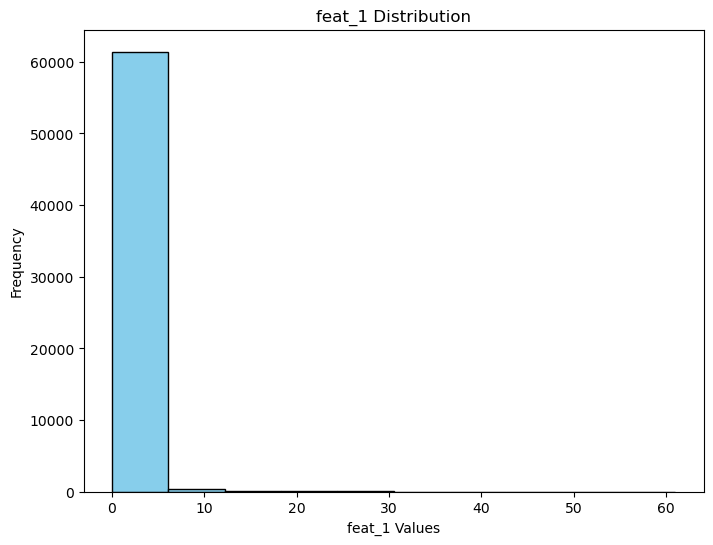

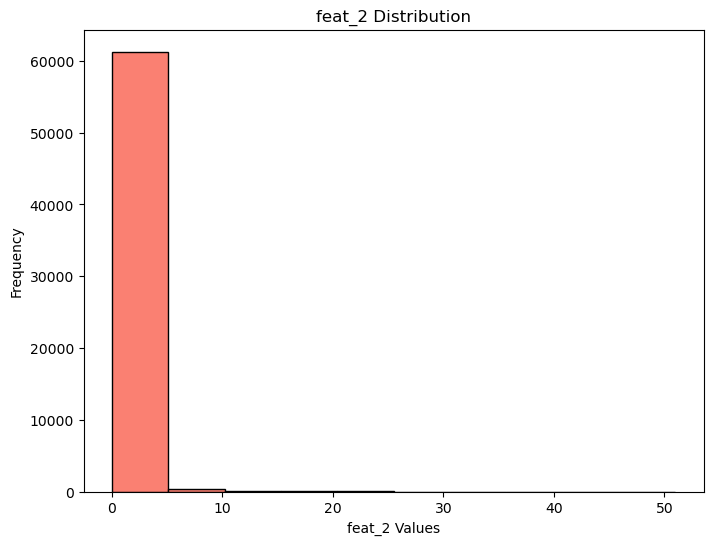

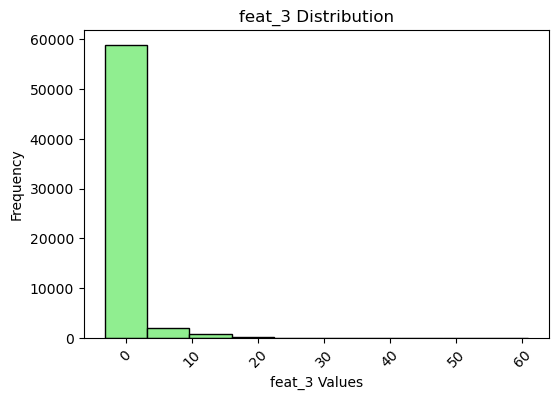

In [6]:
# Histogram of 'feat_1'
plt.figure(figsize=(8, 6))
plt.hist(data['feat_1'], bins=10, color='skyblue', edgecolor='black')
plt.title('feat_1 Distribution')
plt.xlabel('feat_1 Values')
plt.ylabel('Frequency')
plt.show()

# Histogram of 'feat_2'
plt.figure(figsize=(8, 6))
plt.hist(data['feat_2'], bins=10, color='salmon', edgecolor='black')
plt.title('feat_2 Distribution')
plt.xlabel('feat_2 Values')
plt.ylabel('Frequency')
plt.show()

# Histogram of 'feat_3'
plt.figure(figsize=(6, 4))
plt.hist(data['feat_3'], color='lightgreen', edgecolor='black', align='left')
plt.title('feat_3 Distribution')
plt.xlabel('feat_3 Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


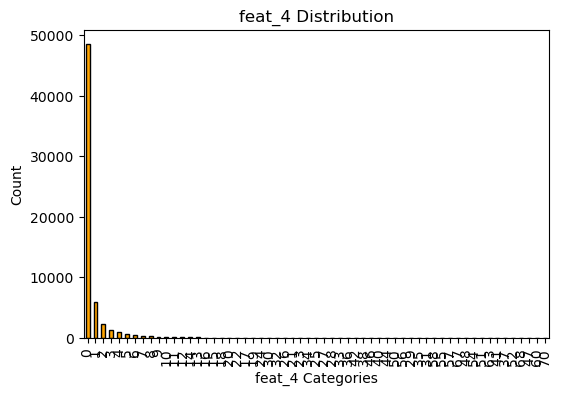

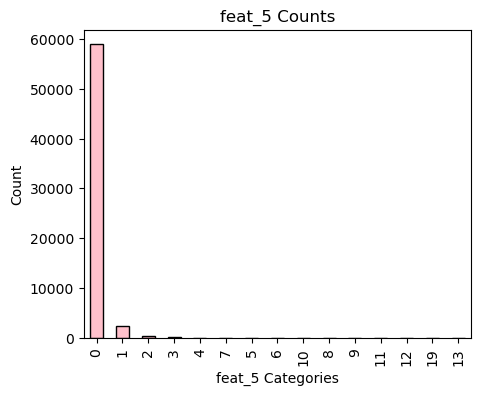

In [7]:
# Bar chart of 'feat_4'
plt.figure(figsize=(6, 4))
data['feat_4'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('feat_4 Distribution')
plt.xlabel('feat_4 Categories')
plt.ylabel('Count')
plt.show()

# Bar chart of 'feat_5' counts
plt.figure(figsize=(5, 4))
data['feat_5'].value_counts().plot(kind='bar', color='pink', edgecolor='black')
plt.title('feat_5 Counts')
plt.xlabel('feat_5 Categories')
plt.ylabel('Count')
plt.show()


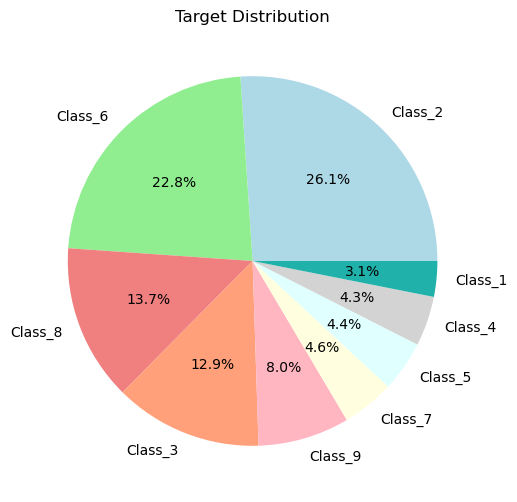

In [8]:
# Pie chart of 'target' distribution
plt.figure(figsize=(6, 6))
data['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightyellow', 'lightcyan', 'lightgrey', 'lightseagreen'])
plt.title('Target Distribution')
plt.ylabel('')
plt.show()


If you look at all the histograms, you can tell that a lot of the data are zero-inflated, so most of the variables contain mostly zeros and then some higher values here and there. No normality, but for most machine learning techniques this is not an issue. 

Because there are so many zeroes, most values above zero will seem to be outliers. The safe decision for this data is to not delete any outliers and see what happens. With many 0s, sparse data is available and high values may be super informative. Moreover, without having any intuitive meaning for each of the features, we don't know if a value of ~260 is actually an outlier.

In [9]:
# Your code here

## Feature engineering and selection with PCA

Have a look at the correlation structure of your features using a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

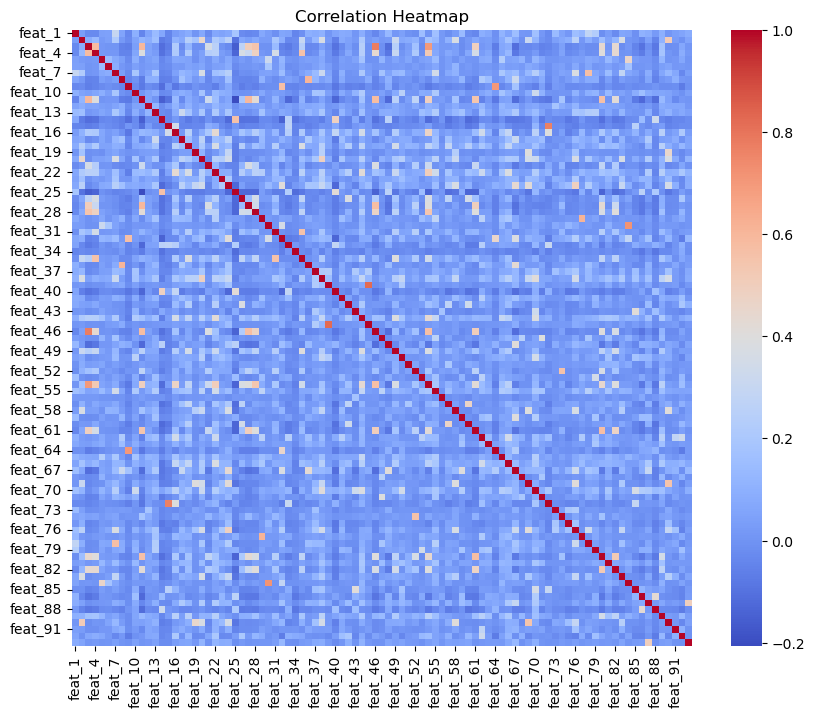

In [10]:
# Correlation between features
correlation_matrix = data.drop(['id', 'target'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


Use PCA to select a number of features in a way that you still keep 80% of your explained variance.

In [26]:
# Step 1: Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data.drop(['id', 'target'], axis=1))

# Step 2: Perform PCA
pca = PCA()
pca.fit(data_std)

# Step 3: Select the number of components to keep 80% explained variance
explained_variance_ratio_cumsum = pca.explained_variance_ratio_.cumsum()
n_components = (explained_variance_ratio_cumsum < 0.8).sum() + 1

print(f"Number of components to retain 80% explained variance: {n_components}")

# Step 4: Transform the data with the selected number of components
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_std)

#  to see the proportion of explained variance for each component
print("Explained variance ratio for each component:")
print(pca.explained_variance_ratio_)


Number of components to retain 80% explained variance: 49
Explained variance ratio for each component:
[0.08555694 0.06587049 0.04177069 0.03177853 0.02821605 0.0261652
 0.02389522 0.02382947 0.02252591 0.02065668 0.01883267 0.01858402
 0.01849297 0.01716182 0.01623436 0.0157334  0.01474743 0.01427021
 0.01394328 0.01313722 0.0126069  0.01231777 0.01213969 0.01139499
 0.01109737 0.01089634 0.01046141 0.01039324 0.01015649 0.01009798
 0.00993188 0.00989836 0.00958377 0.00937836 0.00907605 0.00897141
 0.00881857 0.0086963  0.00841518 0.00825962 0.00814395 0.00806163
 0.00777646 0.00763304 0.00745696 0.00729883 0.00718019 0.00688766
 0.00674317]


## Create a train-test split with a test size of 40%

This is a relatively big training set, so you can assign 40% to the test set. Set the `random_state` to 42. 

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_pca, data['target'], test_size=0.4, random_state=42)

# Check the shape of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (37126, 49)
Shape of X_test: (24752, 49)
Shape of y_train: (37126,)
Shape of y_test: (24752,)


## Create a baseline model

Create your baseline model *in a pipeline setting*. In the pipeline: 

- Your first step will be to scale your features down to the number of features that ensure you keep just 80% of your explained variance (which we saw before)
- Your second step will be to build a basic logistic regression model 

Make sure to fit the model using the training set and test the result by obtaining the accuracy using the test set. Set the `random_state` to 123. 

In [30]:
# Step 1: Scale features down to 80% of explained variance using PCA
pca = PCA(n_components=0.8, random_state=42)

# Step 2: Build the Logistic Regression model
logreg = LogisticRegression(random_state=123)

# Step 3: Create the pipeline
pipeline = Pipeline([
    ('pca', pca),
    ('logreg', logreg)
])

# Step 4: Fit the model using the training set
pipeline.fit(X_train, y_train)

# Test the result by obtaining the accuracy using the test set
accuracy = pipeline.score(X_test, y_test)
print("Accuracy of the Baseline Model:", accuracy)


Accuracy of the Baseline Model: 0.7355769230769231


/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Create a pipeline consisting of a linear SVM, a simple decision tree, and a simple random forest classifier

Repeat the above, but now create three different pipelines:
- One for a standard linear SVM
- One for a default decision tree
- One for a random forest classifier

In [32]:
# ⏰ This cell may take several minutes to run
# Pipeline for a standard linear SVM
pipeline_svm = Pipeline([
    ('svm', SVC(random_state=123))
])

# Pipeline for a default decision tree
pipeline_decision_tree = Pipeline([
    ('decision_tree', DecisionTreeClassifier(random_state=123))
])

# Pipeline for a random forest classifier
pipeline_random_forest = Pipeline([
    ('random_forest', RandomForestClassifier(random_state=123))
])

# Fit and test the pipelines
pipelines = [pipeline_svm, pipeline_decision_tree, pipeline_random_forest]

for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    accuracy = pipeline.score(X_test, y_test)
    print(f"Accuracy of {pipeline.steps[-1][0]}: {accuracy}")


Accuracy of svm: 0.7688267614738203
Accuracy of decision_tree: 0.6684712346477052
Accuracy of random_forest: 0.781431803490627


## Pipeline with grid search

Construct two pipelines with grid search:
- one for random forests - try to have around 40 different models
- one for the AdaBoost algorithm 

### Random Forest pipeline with grid search

In [ ]:
# imports
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline




# Pipeline for Random Forests
pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier(random_state=123))
])

# Parameter grid for Random Forests
param_grid_rf = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 'log2']
}

# Grid search for Random Forests
grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=3, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and accuracy for Random Forests
print("Best parameters for Random Forests:")
print(grid_search_rf.best_params_)
print("Accuracy of Random Forests:", grid_search_rf.best_score_)

# Pipeline for AdaBoost
pipeline_adaboost = Pipeline([
    ('adaboost', AdaBoostClassifier(random_state=123))
])

# Parameter grid for AdaBoost
param_grid_adaboost = {
    'adaboost__n_estimators': [50, 100, 150],
    'adaboost__learning_rate': [0.01, 0.1, 1.0],
    'adaboost__base_estimator': [None, DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)]
}

# Grid search for AdaBoost
grid_search_adaboost = GridSearchCV(pipeline_adaboost, param_grid=param_grid_adaboost, cv=3, n_jobs=-1)
grid_search_adaboost.fit(X_train, y_train)

# Best parameters and accuracy for AdaBoost
print("\nBest parameters for AdaBoost:")
print(grid_search_adaboost.best_params_)
print("Accuracy of AdaBoost:", grid_search_adaboost.best_score_)


/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/saturncloud/envs/saturn/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

In [20]:
# Your code here
# ⏰ This cell may take a long time to run!


Use your grid search object along with `.cv_results` to get the full result overview

In [ ]:
### AdaBoost

In [21]:
# Full result overview for Random Forests
print("Full result overview for Random Forests:")
print(grid_search_rf.cv_results_)

# Full result overview for AdaBoost
print("\nFull result overview for AdaBoost:")
print(grid_search_adaboost.cv_results_)

# ⏰ This cell may take several minutes to run


### Level-up (Optional): SVM pipeline with grid search 

As extra level-up work, construct a pipeline with grid search for support vector machines. 
* Make sure your grid isn't too big. You'll see it takes quite a while to fit SVMs with non-linear kernel functions!

In [24]:
# Your code here
# ⏰ This cell may take a very long time to run!

# Assuming you have already set 'X_train', 'X_test', 'y_train', 'y_test'

# Pipeline for SVM
pipeline_svm = Pipeline([
    ('svm', SVC(kernel='rbf', random_state=123))
])

# Parameter grid for SVM
param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.01, 0.1, 1]
}

# Grid search for SVM
grid_search_svm = GridSearchCV(pipeline_svm, param_grid=param_grid_svm, cv=3, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Best parameters and accuracy for SVM
print("Best parameters for SVM:")
print(grid_search_svm.best_params_)
print("Accuracy of SVM:", grid_search_svm.best_score_)


Use your grid search object along with `.cv_results` to get the full result overview: 

In [25]:
# Full result overview for SVM
print("Full result overview for SVM:")
print(grid_search_svm.cv_results_)


## Note

Note that this solution is only one of many options. The results in the Random Forest and AdaBoost models show that there is a lot of improvement possible by tuning the hyperparameters further, so make sure to explore this yourself!

## Summary 

Great! You've gotten a lot of practice in using PCA in pipelines. What algorithm would you choose and why?